# Project 1: Explanatory Data Analysis & Data Presentation (Movies Dataset)

## PACKAGE IMPORTS

In [1]:
import importlib.util
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import pandas as pd
import pyperclip3 as clip
import seaborn as sns
import xlwings as xw
import math
import pprint
from wordcloud import WordCloud

from io import StringIO
from pathlib import Path
from icecream import ic
from IPython.display import HTML, display
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

## IMPORT DATA

In [2]:
df = pd.read_csv("movies_complete.csv")

## INCORPORATE OTHER FUNCTIONS FROM IMPORT DIRECTORY

I like to use several utility functions I've made over the years that help me work with data in Jupyter notebooks. 

This will be used in this project as well as many others in the repo. 

In [3]:
from pathlib import Path
import importlib.util 

def load_function(module_name, function_name):
    """
    Dynamically imports a specific function from a module, designed to work
    in a Jupyter notebook context or a standard Python script.

    Parameters
    ----------
    module_name : str
        The name of the module (without the .py extension).
    function_name : str
        The name of the function to import from the module.

    Returns
    -------
    function or None
        The imported function, or None if something went wrong.

    Examples
    --------
    Assume we have a Python module named 'math_operations.py' with a function named 'add':

    # math_operations.py
    def add(a, b):
        return a + b

    Here is how you can use `load_function` to dynamically load and use the 'add' function:

    >>> loaded_add_function = load_function("math_operations", "add")
    >>> if loaded_add_function:
    ...     result = loaded_add_function(2, 3)
    ...     print(f"Result: {result}")
    ...
    Result: 5
    """
    # Use the current working directory as the base for the 'imports' directory
    project_root = Path.cwd().parent  # This works if the notebook's working directory is the project root
    module_path = project_root / "imports" / f"{module_name}.py"

    spec = importlib.util.spec_from_file_location(module_name, str(module_path))
    if spec is None:
        print(f"Spec not found for module: {module_name}")
        return None

    module = importlib.util.module_from_spec(spec)
    try:
        spec.loader.exec_module(module)
        return getattr(module, function_name, None)
    except Exception as e:
        print(f"Error loading function {function_name} from module {module_name}: {e}")
        return None


In [4]:
# Test to see if the 'load_function' function is available.
hello_world = load_function('hello', 'hello_world')
hello_world()

Hello World!


__Features__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [5]:
# Get some info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

We need to know how many values are actually missing in the dataset. We also see `release_date` as a string (object) when it should be a date. 

In [6]:
# How many values are actually missing from the dataset?
missing_values_fnc = load_function('null_values_sum_fnc', 'null_values_sum')
missing_values_df = missing_values_fnc(df)
missing_values_df

,Column,Null Values,Percentage
5,belongs_to_collection,40228,90.01%
8,revenue_musd,37306,83.48%
7,budget_musd,35837,80.19%
2,tagline,24407,54.61%
9,production_companies,11335,25.36%
10,production_countries,5856,13.10%
16,spoken_languages,3597,8.05%
12,vote_average,2614,5.85%
18,cast,2189,4.90%
4,genres,2105,4.71%


In [7]:
# Load the missing values df into Excel for a better viewing.
view_df_in_excel = load_function('load_dataframe_to_excel', 'open_df_in_excel')
display_missing_in_xl = input('Do you want to see the missing values in Excel?')
if display_missing_in_xl == 'y':
    view_df_in_excel(missing_values_df)

<a href="http://imageshack.com/a/img922/8443/MNIQPC.png"><img src="http://imagizer.imageshack.us/v2/256x0q90/922/MNIQPC.png"></a>

| Column                | Null Values | Percentage |
|-----------------------|-------------|------------|
| belongs_to_collection | 40228       | 90.01%     |
| revenue_musd          | 37306       | 83.48%     |
| budget_musd           | 35837       | 80.19%     |
| tagline               | 24407       | 54.61%     |
| production_companies  | 11335       | 25.36%     |
| production_countries  | 5856        | 13.10%     |
| spoken_languages      | 3597        | 8.05%      |
| vote_average          | 2614        | 5.85%      |
| cast                  | 2189        | 4.90%      |
| genres                | 2105        | 4.71%      |
| runtime               | 1512        | 3.38%      |
| overview              | 951         | 2.13%      |
| director              | 731         | 1.64%      |
| poster_path           | 224         | 0.50%      |
| release_date          | 34          | 0.08%      |
| original_language     | 10          | 0.02%      |
| id                    | 0           | 0.00%      |
| title                 | 0           | 0.00%      |
| vote_count            | 0           | 0.00%      |
| popularity            | 0           | 0.00%      |
| cast_size             | 0           | 0.00%      |
| crew_size             | 0           | 0.00%      |

**Image Commentary**

In the image above (and markdown table) you can see that I sorted the output in Excel by the highest to lowest percentage of missing values. Interestingly, the third highest is the budget in millions of US dollars. My guess is that these will affect other columns statistically this has to be an important column.  

We'll have to deal with missing values at some point, but for now, we just explore the data set.

How many values exist in each column? 

In [8]:
# We'll need to look at the unique values in the dataset. These are the number of values in each column.
unique_values_df = load_function('return_unique_counts_fnc', 'unique_values_by_column')
print('Count of Values by Column:')
unique_values_df(df)

Count of Values by Column:


id                       44691
poster_path              44456
overview                 43715
popularity               43204
cast                     42166
title                    41605
production_companies     22537
tagline                  20171
director                 17349
release_date             17225
revenue_musd              6850
genres                    4044
production_countries      2377
spoken_languages          1828
vote_count                1820
belongs_to_collection     1691
budget_musd               1218
runtime                    352
crew_size                  189
cast_size                  151
vote_average                92
original_language           89
dtype: int64

In [9]:
# We can look at the complete dataset in Excel because it's actually not too big
display_counts_in_xl = input('Do you want to see the counts in Excel? (y/n)')
if display_counts_in_xl == 'y':
    view_df_in_excel(df)

**Dataframe Commentary**

I like to load into Excel, then use Power Query to get a histogram of all the columns. I can generally see everything I need to know in the Power Query view. However, Pandas has these features, so they will be loaded here for viewers of the notebook.


Which columns are numerical and which are categorical? 

In [10]:
# Get a slightly better understanding of the data types, e.g., are they numerical or categorical?
var_types = load_function('identify_var_types_fnc', 'categorize_column_types')
if var_types:
    var_types(df)
else:
    print('Sorry, could not display the variable types of the dataset.')

{'categorical': ['title',
                 'tagline',
                 'release_date',
                 'genres',
                 'belongs_to_collection',
                 'original_language',
                 'production_companies',
                 'production_countries',
                 'overview',
                 'spoken_languages',
                 'poster_path',
                 'cast',
                 'director'],
 'numerical': ['id',
               'budget_musd',
               'revenue_musd',
               'vote_count',
               'vote_average',
               'popularity',
               'runtime',
               'cast_size',
               'crew_size']}


The majority of the data is categorical, which is handled differently than numerical. For example we did a chart of histograms for the numerical data, but this doesn't provide much insight. So we did bar charts for the categorical data. Going forward we have to keep this in mind. 

## BACKUP THE DATASET BEFORE MAKING CHANGES.

In [11]:
df_backup = df.copy() # Copy the original dataset as my new working dataset and keep a backup if needed here. 

Change the `release_date` column to a datetime object by using infer_datetime_format().

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

In [13]:
# Load the missing values df into Excel for a better viewing.
view_df_in_excel = load_function('load_dataframe_to_excel', 'open_df_in_excel')
display_df_in_xl = input('Do you want to see the dataframe in Excel? (y/n)')
if display_df_in_xl == 'y':
    view_df_in_excel(df)


In [14]:
num_rows, num_columns = df.shape
display("Columns: ", num_columns)
display("Rows: ", num_rows)
clip.copy(str(num_rows))

genre_values = df['genres'].unique()
genre_series = pd.Series(genre_values)
display(genre_series)

cast_values = df['cast'].unique()
cast_series = pd.Series(cast_values)
display(cast_series)


'Columns: '

22

'Rows: '

44691

0               Animation|Comedy|Family
1              Adventure|Fantasy|Family
2                        Romance|Comedy
3                  Comedy|Drama|Romance
4                                Comedy
                     ...               
4040       Fantasy|Comedy|Romance|Drama
4041                Comedy|Horror|Drama
4042         Crime|Comedy|Action|Family
4043     Action|Mystery|Thriller|Horror
4044    Family|Animation|Romance|Comedy
Length: 4045, dtype: object

0        Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1        Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2        Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...
3        Whitney Houston|Angela Bassett|Loretta Devine|...
4        Steve Martin|Diane Keaton|Martin Short|Kimberl...
                               ...                        
42162    Patrick Bergin|Uma Thurman|David Morrissey|Jür...
42163              Leila Hatami|Kourosh Tahami|Elham Korda
42164    Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...
42165    Erika Eleniak|Adam Baldwin|Julie du Page|James...
42166    Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...
Length: 42167, dtype: object

There's really a vast array of genres and actors, but this notebook is not concerned with studying these values. 

In [15]:
# We only want to see numerical data here in the series summary (statistics) not categorical data.
series_summary_numerical = df.describe(include=['number'])
print('Series Summary (numerical):\n')
display(series_summary_numerical)

Series Summary (numerical):



,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44691.00,8854.00,7385.00,44691.00,42077.00,44691.00,43179.00,44691.00,44691.00
mean,107186.24,21.67,68.97,111.65,6.00,2.96,97.57,12.48,10.31
std,111806.36,34.36,146.61,495.32,1.28,6.04,34.65,12.12,15.89
min,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,26033.50,2.00,2.41,3.00,5.30,0.40,86.00,6.00,2.00
50%,59110.00,8.20,16.87,10.00,6.10,1.15,95.00,10.00,6.00
75%,154251.00,25.00,67.64,35.00,6.80,3.77,107.00,15.00,12.00
max,469172.00,380.00,2787.97,14075.00,10.00,547.49,1256.00,313.00,435.00


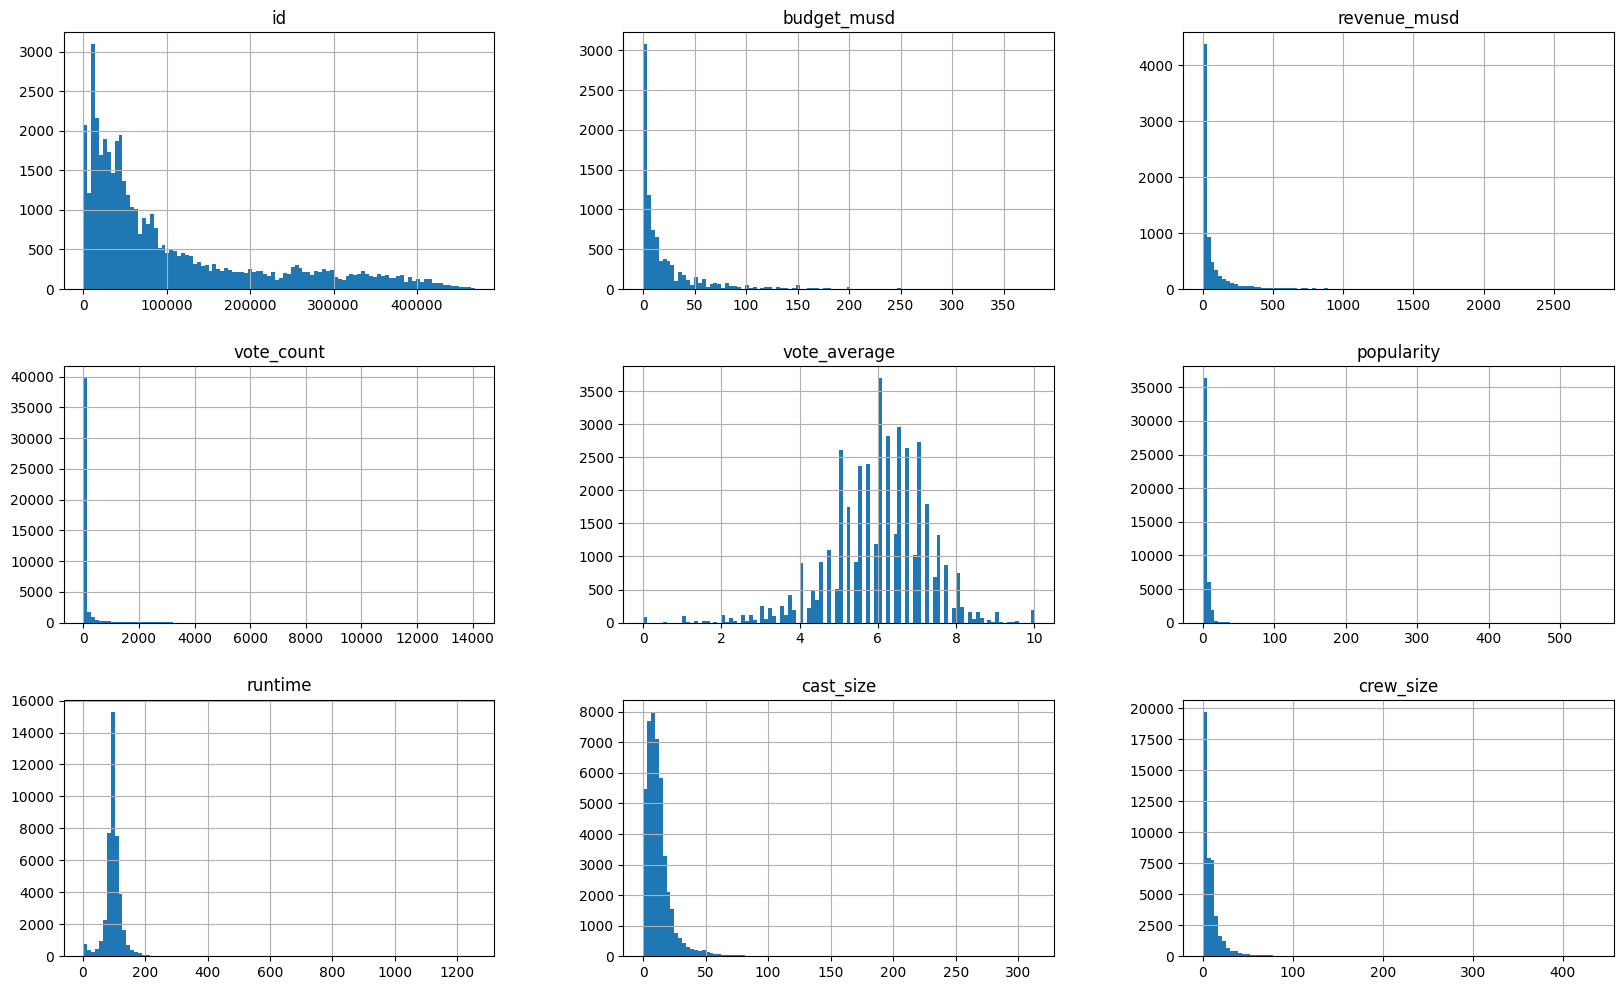

In [16]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical columns
df[numerical_columns].hist(figsize=(20, 12), bins=100)
plt.show()


In [17]:
# Beyond the histogram, I want to create bar charts for each of the
# columns. To do this I need to know the binsize. A custom function
# returns these values. 
bin_size_fnc = load_function('calculate_binsize_for_columns_fnc', 'calculate_binsize_for_columns')
binsize_df = bin_size_fnc(df)
binsize_df

,Column,Bin Size,Type
0,id,64,Continuous
1,budget_musd,170,Continuous
2,revenue_musd,416,Continuous
3,vote_count,7804,Continuous
4,vote_average,115,Continuous
5,popularity,2885,Continuous
6,runtime,1048,Continuous
7,cast_size,617,Continuous
8,crew_size,771,Continuous


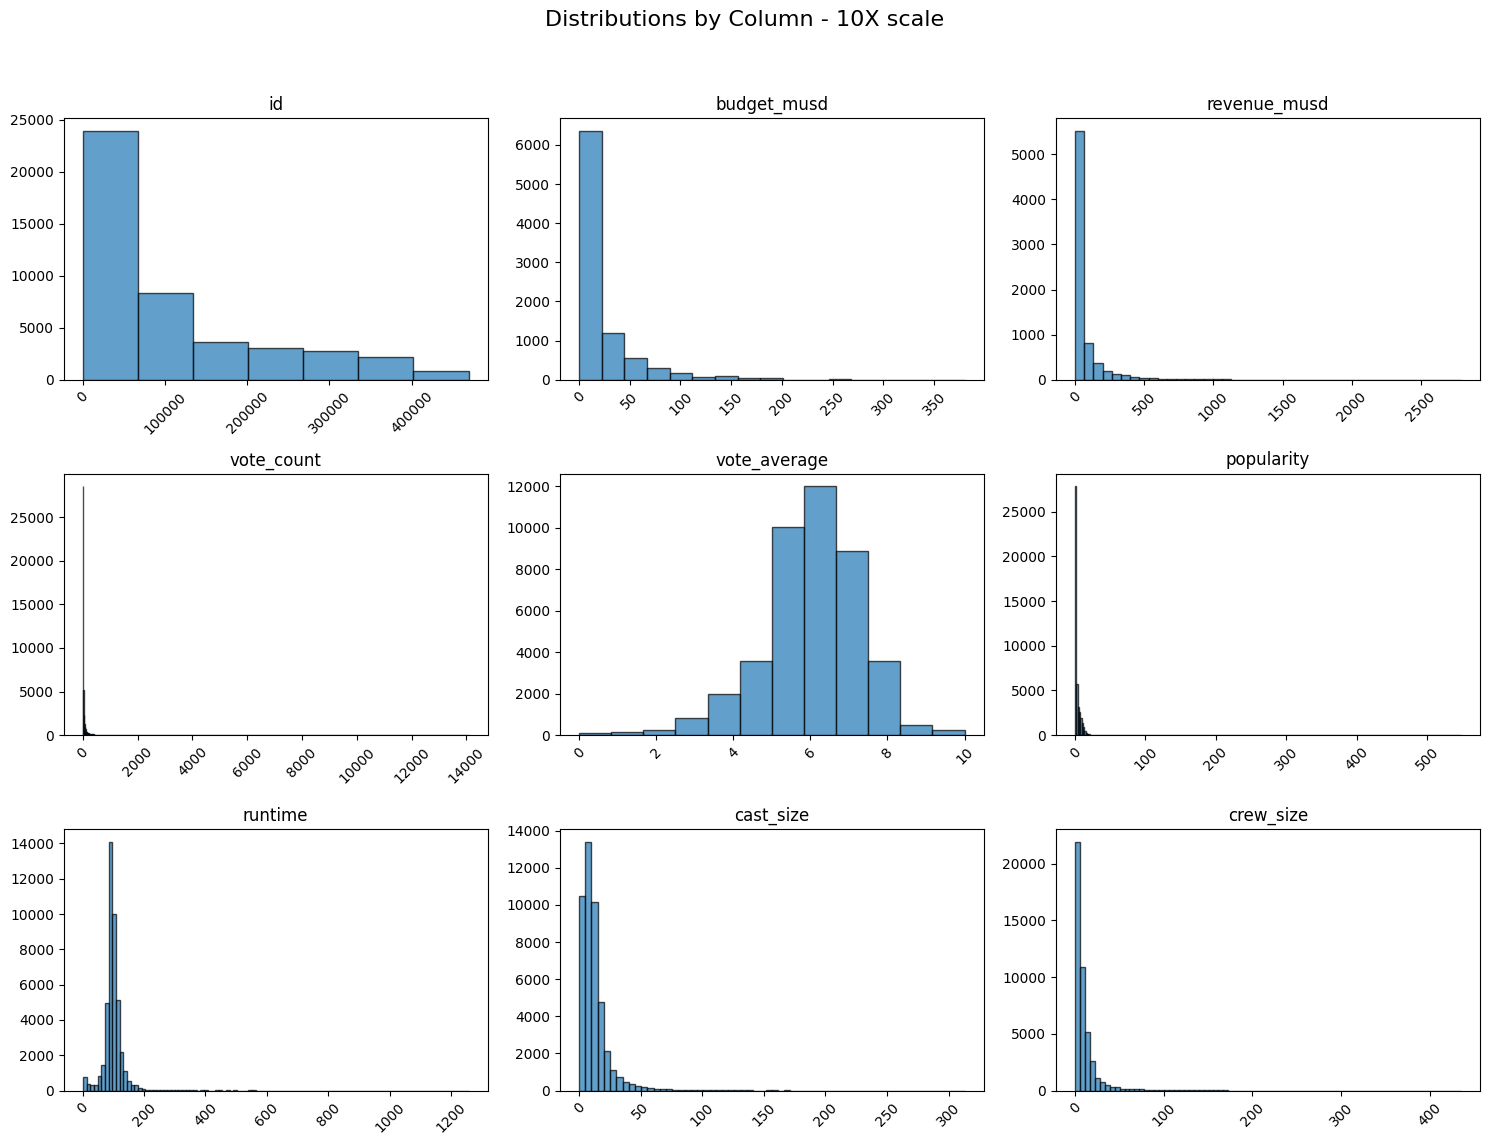

In [18]:
plot_columns = load_function(
    'plot_column_distributions_fnc', 
    'plot_column_distributions'
)
plot_columns(df, binsize_df, grid_title='Distributions by Column - 10X scale')

In [19]:
# just a breif peek at the frequency of certain values
df.budget_musd.value_counts(dropna = False).head(20)

budget_musd
NaN      35837
5.00       286
10.00      258
20.00      243
2.00       241
15.00      226
3.00       220
25.00      206
1.00       195
30.00      189
4.00       180
6.00       173
12.00      171
40.00      166
8.00       155
35.00      141
0.50       141
7.00       137
50.00      124
1.50       119
Name: count, dtype: int64

In [20]:
df.revenue_musd.value_counts(dropna = False).head(20)

revenue_musd
NaN      37306
12.00       20
10.00       19
11.00       19
2.00        18
6.00        17
5.00        14
0.50        13
8.00        13
0.00        12
14.00       12
7.00        11
3.00        10
1.00        10
20.00       10
0.00         9
1.50         9
4.00         9
30.00        8
4.10         8
Name: count, dtype: int64

In [21]:
df.vote_average.value_counts(dropna = False)

vote_average
NaN     2614
6.00    2421
5.00    1969
7.00    1859
6.50    1705
        ... 
9.40       3
9.60       1
9.80       1
0.70       1
1.10       1
Name: count, Length: 93, dtype: int64

In [22]:
df.vote_count.value_counts()

vote_count
1.00       3186
2.00       3056
3.00       2729
0.00       2614
4.00       2442
           ... 
2755.00       1
1187.00       1
4200.00       1
3322.00       1
2712.00       1
Name: count, Length: 1820, dtype: int64

In [23]:
df.describe(include = "object")

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,4044,1691,89,22537,2377,43715,1828,44456,42166,17349
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,John Ford
freq,11,7,4935,29,31755,741,17723,3,22189,3,24,66


In [24]:
# Cinderella is the most frequent title, duplicate? no it is just different years
df[df.title == "Cinderella"] # Is this a duplicate title?

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
984,11224,Cinderella,The greatest love story ever told.,1950-03-04,Family|Fantasy|Animation|Romance,Cinderella Collection,en,2.90,263.59,RKO Radio Pictures|Walt Disney Productions,United States of America,1760.00,6.80,14.44,74.00,Cinderella has faith her dreams of a better li...,English,<img src='http://image.tmdb.org/t/p/w185//avz6...,Ilene Woods|Eleanor Audley|Lucille Bliss|Verna...,11,50,Clyde Geronimi
12988,42884,Cinderella,NaN,1997-11-02,TV Movie|Family|Fantasy|Music|Romance,NaN,en,NaN,NaN,Walt Disney Television|Citadel Entertainment|S...,United States of America,28.00,6.10,2.10,88.00,Updated version of the classic Rodgers and Ham...,English,<img src='http://image.tmdb.org/t/p/w185//54aw...,Brandy Norwood|Whitney Houston|Whoopi Goldberg...,5,1,Robert Iscove
23254,92349,Cinderella,NaN,1914-12-28,Fantasy|Drama,NaN,en,NaN,NaN,NaN,United States of America,7.00,5.40,0.36,52.00,Based on Charles Perrault's fairy tale: Cinder...,English,<img src='http://image.tmdb.org/t/p/w185//bL1K...,Mary Pickford|Owen Moore|Isabel Vernon|Georgia...,7,2,James Kirkwood
23265,105875,Cinderella,The version children love!,2002-08-06,Animation|Family|Fantasy,NaN,en,NaN,NaN,GoodTimes Entertainment,Japan|United States of America,2.00,6.00,2.15,48.00,"Cinderella, the beautiful and kind-hearted rag...",Afrikaans,<img src='http://image.tmdb.org/t/p/w185//rbzG...,Tony Ail|Nathan Aswell|Chera Bailey|Kathleen B...,7,3,Toshiyuki Hiruma
28073,261985,Cinderella,NaN,2011-10-30,Family|TV Movie,NaN,en,NaN,NaN,Beta Film|Lux Vide|ARD/Degeto Film GmbH|Rai Fi...,Italy,9.00,5.30,0.99,180.00,Once upon a time in post-war Rome: 13-year old...,English,<img src='http://image.tmdb.org/t/p/w185//wjZK...,Vanessa Hessler|Flavio Parenti|Natalia Wörner|...,14,11,Christian Duguay
28340,150689,Cinderella,Midnight is just the beginning.,2015-03-12,Romance|Fantasy|Family|Drama,NaN,en,95.00,543.51,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,United Kingdom|United States of America,2426.00,6.70,19.80,105.00,"When her father unexpectedly passes away, youn...",English,<img src='http://image.tmdb.org/t/p/w185//iH4C...,Lily James|Cate Blanchett|Richard Madden|Helen...,78,80,Kenneth Branagh
33805,42651,Cinderella,NaN,1947-11-28,Comedy|Family|Fantasy,NaN,ru,NaN,NaN,Lenfilm,Russia,5.00,4.80,0.49,80.00,"Based on a classic fairytale ""Cinderella"" bril...",Pусский,<img src='http://image.tmdb.org/t/p/w185//p41r...,Yanina Zhejmo|Aleksei Konsovsky|Faina Ranevska...,6,4,Nadezhda Kosheverova
35114,44459,Cinderella,NaN,1957-03-31,Drama|Romance,NaN,en,NaN,NaN,NaN,United States of America,5.00,5.90,0.21,77.00,The first of three TV-versions of the classic ...,English,<img src='http://image.tmdb.org/t/p/w185//cB6I...,Julie Andrews|Howard Lindsay|Howard Lindsay|Il...,9,10,Ralph Nelson
35116,289673,Cinderella,NaN,2000-01-01,NaN,NaN,en,NaN,NaN,NaN,NaN,5.00,5.60,1.09,90.00,Cinderella (named Zezolla) and her family live...,English,<img src='http://image.tmdb.org/t/p/w185//gMYk...,Kathleen Turner|Katrin Cartlidge|David Warner|...,10,6,Beeban Kidron
40439,114108,Cinderella,NaN,1899-10-01,Fantasy|Horror|Science Fiction|Family,NaN,fr,NaN,NaN,Star-Film|Georges Méliès,France,19.00,5.50,1.30,5.00,A fairy godmother magically turns Cinderella's...,No Language,<img src='http://image.tmdb.org/t/p/w185//cf0g...,Georges Méliès|Barral|Bleuette Bernon|Carmely|...,6,2,Georges Méliès


## The best and the worst movies... (Part 1)

In [25]:
pd.options.display.max_colwidth = 200

In [26]:
# Take a peek at the columns and decide which ones are important.
columns_peek = df.columns.to_list()
display(columns_peek)

['id',
 'title',
 'tagline',
 'release_date',
 'genres',
 'belongs_to_collection',
 'original_language',
 'budget_musd',
 'revenue_musd',
 'production_companies',
 'production_countries',
 'vote_count',
 'vote_average',
 'popularity',
 'runtime',
 'overview',
 'spoken_languages',
 'poster_path',
 'cast',
 'cast_size',
 'crew_size',
 'director']

In [28]:
# Make a copy of the data frame that only shows the most important columns for analysis.
target_columns_df = df[
    [
        "poster_path", "title", "budget_musd", "revenue_musd",
        "vote_count", "vote_average", "popularity", 'release_date'
    ]
].copy()
target_columns_df

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,release_date
0,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,Toy Story,30.00,373.55,5415.00,7.70,21.95,1995-10-30
1,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,Jumanji,65.00,262.80,2413.00,6.90,17.02,1995-12-15
2,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,Grumpier Old Men,NaN,NaN,92.00,6.50,11.71,1995-12-22
3,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86,1995-12-22
4,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,Father of the Bride Part II,NaN,76.58,173.00,5.70,8.39,1995-02-10
...,...,...,...,...,...,...,...,...
44686,<img src='http://image.tmdb.org/t/p/w185//pfC8gZ1BQANxxdadIMpdywbPG9X.jpg' style='height:100px;'>,Subdue,NaN,NaN,1.00,4.00,0.07,NaT
44687,<img src='http://image.tmdb.org/t/p/w185//xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg' style='height:100px;'>,Century of Birthing,NaN,NaN,3.00,9.00,0.18,2011-11-17
44688,<img src='http://image.tmdb.org/t/p/w185//eGgakGLQQzUwrCfTxcGu3mXPf8g.jpg' style='height:100px;'>,Betrayal,NaN,NaN,6.00,3.80,0.90,2003-08-01
44689,<img src='http://image.tmdb.org/t/p/w185//aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg' style='height:100px;'>,Satan Triumphant,NaN,NaN,0.00,NaN,0.00,1917-10-21


In [29]:
# MUSD note:
#^ Anywhere it says 'musd' then we are looking at the million US dollar amounts.
#^ These lines create new columns that show profit and ROI for the movies. 

target_columns_df["profit_musd"] = df.revenue_musd.sub(df.budget_musd)
target_columns_df["roi"] = df.revenue_musd.div(df.budget_musd)


In [32]:
target_columns_df.head(5)

,Poster Path,Title,Budget,Revenue,Votes,Average Rating,Popularity,Released,Profit,ROI
0,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,Toy Story,30.00,373.55,5415.00,7.70,21.95,1995-10-30,343.55,12.45
1,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,Jumanji,65.00,262.80,2413.00,6.90,17.02,1995-12-15,197.80,4.04
2,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,Grumpier Old Men,NaN,NaN,92.00,6.50,11.71,1995-12-22,NaN,NaN
3,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86,1995-12-22,65.45,5.09
4,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,Father of the Bride Part II,NaN,76.58,173.00,5.70,8.39,1995-02-10,NaN,NaN


In [31]:
# Rename the columns.
target_columns_df.columns = [
    "Poster Path", "Title", "Budget", "Revenue", "Votes", 
    "Average Rating", "Popularity","Released", "Profit", "ROI"
]

In [33]:
if var_types:
    var_types(target_columns_df)
else:
    print('Sorry, could not display the variable types of the dataset.')


{'categorical': ['Poster Path', 'Title'],
 'numerical': ['Budget',
               'Revenue',
               'Votes',
               'Average Rating',
               'Popularity',
               'Profit',
               'ROI']}


In [34]:
target_columns_df.columns.to_list()

['Poster Path',
 'Title',
 'Budget',
 'Revenue',
 'Votes',
 'Average Rating',
 'Popularity',
 'Released',
 'Profit',
 'ROI']

In [35]:
# Set the movie title as the index.
target_columns_df.set_index("Title", inplace = True)

In [36]:
target_columns_df

,Poster Path,Budget,Revenue,Votes,Average Rating,Popularity,Released,Profit,ROI
Title,,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,30.00,373.55,5415.00,7.70,21.95,1995-10-30,343.55,12.45
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,65.00,262.80,2413.00,6.90,17.02,1995-12-15,197.80,4.04
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,NaN,NaN,92.00,6.50,11.71,1995-12-22,NaN,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,16.00,81.45,34.00,6.10,3.86,1995-12-22,65.45,5.09
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,NaN,76.58,173.00,5.70,8.39,1995-02-10,NaN,NaN
...,...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8gZ1BQANxxdadIMpdywbPG9X.jpg' style='height:100px;'>,NaN,NaN,1.00,4.00,0.07,NaT,NaN,NaN
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg' style='height:100px;'>,NaN,NaN,3.00,9.00,0.18,2011-11-17,NaN,NaN
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGgakGLQQzUwrCfTxcGu3mXPf8g.jpg' style='height:100px;'>,NaN,NaN,6.00,3.80,0.90,2003-08-01,NaN,NaN


In [37]:
# Look at the poster path as a string
target_columns_df.iloc[0,0]

"<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>"

In [38]:
# Look at a subset of the dataframe to see the poster url and budget.
subset = target_columns_df.iloc[:5, :2]
subset

,Poster Path,Budget
Title,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,30.00
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,65.00
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,16.00
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,NaN


In [39]:
# Look at the subset as a web preview
HTML(subset.to_html(escape=False))

,Poster Path,Budget
Title,,
Toy Story,,30.00
Jumanji,,65.00
Grumpier Old Men,,NaN
Waiting to Exhale,,16.00
Father of the Bride Part II,,NaN


In [40]:
# What's the highest rated movie? 
target_columns_df.sort_values(by = "Average Rating", ascending = False)

,Poster Path,Budget,Revenue,Votes,Average Rating,Popularity,Released,Profit,ROI
Title,,,,,,,,,
Portrait of a Young Man in Three Movements,NaN,NaN,NaN,1.00,10.00,0.04,1931-04-15,NaN,NaN
Brave Revolutionary,<img src='http://image.tmdb.org/t/p/w185//zAb2YxgYSJTcloGTHAA9ogOVq7M.jpg' style='height:100px;'>,NaN,NaN,1.00,10.00,0.32,1994-07-22,NaN,NaN
Other Voices Other Rooms,<img src='http://image.tmdb.org/t/p/w185//4ifPBA4AjRQWxgVJAwSwWp6nFCa.jpg' style='height:100px;'>,NaN,NaN,1.00,10.00,0.04,1995-09-15,NaN,NaN
The Lion of Thebes,<img src='http://image.tmdb.org/t/p/w185//tdOcmIjI8sx9RZIsVgOlq4kQgJ4.jpg' style='height:100px;'>,NaN,NaN,1.00,10.00,1.78,1964-06-27,NaN,NaN
Katt Williams: Priceless: Afterlife,<img src='http://image.tmdb.org/t/p/w185//wKrH5tKdJa3y5jqAQM1eYmkXbHX.jpg' style='height:100px;'>,NaN,NaN,2.00,10.00,0.48,2014-08-16,NaN,NaN
...,...,...,...,...,...,...,...,...,...
Altar of Fire,<img src='http://image.tmdb.org/t/p/w185//iJ78kYBNFIJ1HhZ2DoDf3MyN0ca.jpg' style='height:100px;'>,NaN,NaN,0.00,NaN,0.00,1976-01-01,NaN,NaN
The Wonders of Aladdin,<img src='http://image.tmdb.org/t/p/w185//AvfX3BwSpd3WzNgMh9UbIuKprBZ.jpg' style='height:100px;'>,NaN,NaN,0.00,NaN,0.09,1961-10-31,NaN,NaN
Deep Hearts,<img src='http://image.tmdb.org/t/p/w185//8jI4ykkIVDmrYgUjDld9i0aulMq.jpg' style='height:100px;'>,NaN,NaN,0.00,NaN,0.01,1981-01-01,NaN,NaN


**Highest Rated Movies** are not accurately reflected here because we would need to filter out votes less than the mean. This example shows the highest rated movies also have no revenue and only one vote. The mean value for number of votes is 112. 

In [41]:
avg_votes = target_columns_df['Votes'].mean()
filter_by_votes = target_columns_df[target_columns_df['Votes'] >= avg_votes]
sorted_fitered_df = filter_by_votes.sort_values(by = 'Average Rating', ascending = False)

In [42]:
sorted_fitered_df

,Poster Path,Budget,Revenue,Votes,Average Rating,Popularity,Released,Profit,ROI
Title,,,,,,,,,
Dilwale Dulhania Le Jayenge,<img src='http://image.tmdb.org/t/p/w185//2CAL2433ZeIihfX1Hb2139CX0pW.jpg' style='height:100px;'>,13.20,100.00,661.00,9.10,34.46,1995-10-20,86.80,7.58
Planet Earth,<img src='http://image.tmdb.org/t/p/w185//koVzjt54bJEVuKTmGC4cExcbE2w.jpg' style='height:100px;'>,NaN,NaN,176.00,8.80,4.50,2006-12-10,NaN,NaN
The Shawshank Redemption,<img src='http://image.tmdb.org/t/p/w185//5KCVkau1HEl7ZzfPsKAPM0sMiKc.jpg' style='height:100px;'>,25.00,28.34,8358.00,8.50,51.65,1994-09-23,3.34,1.13
Your Name.,<img src='http://image.tmdb.org/t/p/w185//iaiy3tg9QVkDpObm1IGqmbC9A5C.jpg' style='height:100px;'>,NaN,355.30,1030.00,8.50,34.46,2016-08-26,NaN,NaN
The Godfather,<img src='http://image.tmdb.org/t/p/w185//iVZ3JAcAjmguGPnRNfWFOtLHOuY.jpg' style='height:100px;'>,6.00,245.07,6024.00,8.50,41.11,1972-03-14,239.07,40.84
...,...,...,...,...,...,...,...,...,...
Epic Movie,<img src='http://image.tmdb.org/t/p/w185//l0lGJiTzU2Ce6T31DIRWv7I0kaC.jpg' style='height:100px;'>,20.00,86.87,334.00,3.20,5.55,2007-01-25,66.87,4.34
Alone in the Dark,<img src='http://image.tmdb.org/t/p/w185//tQZbMfQmsUvfoR2nZyqXLOAKzmk.jpg' style='height:100px;'>,20.00,10.44,174.00,3.10,5.87,2005-01-28,-9.56,0.52
Disaster Movie,<img src='http://image.tmdb.org/t/p/w185//3J8XKUfhJiNzwobUZVtizXYPe8b.jpg' style='height:100px;'>,25.00,14.11,250.00,3.10,11.63,2008-08-29,-10.89,0.56


This is more meaningful because we're seeing the results from movies with at least the averate number of votes of 112. 

In [43]:
# Show highest return on investment movies. 
target_columns_df.sort_values(by = "ROI", ascending = False)

,Poster Path,Budget,Revenue,Votes,Average Rating,Popularity,Released,Profit,ROI
Title,,,,,,,,,
Less Than Zero,<img src='http://image.tmdb.org/t/p/w185//1GY0ZhAxOR2RgxGnOkeKoKb2mFM.jpg' style='height:100px;'>,0.00,12.40,77.00,6.10,4.03,1987-11-06,12.40,12396383.00
Modern Times,<img src='http://image.tmdb.org/t/p/w185//7uoiKOEjxBBW0AgDGQWrlfGQ90w.jpg' style='height:100px;'>,0.00,8.50,881.00,8.10,8.16,1936-02-05,8.50,8500000.00
Welcome to Dongmakgol,<img src='http://image.tmdb.org/t/p/w185//5iGVw8AdnUJ3xNaZ5iipfsv2e5.jpg' style='height:100px;'>,0.00,33.58,49.00,7.70,4.22,2005-08-04,33.58,4197476.62
Aquí Entre Nos,<img src='http://image.tmdb.org/t/p/w185//oflxxk94TjmjMdotXnajh64iMad.jpg' style='height:100px;'>,0.00,2.76,3.00,6.00,0.23,2012-03-30,2.76,2755584.00
"The Karate Kid, Part II",<img src='http://image.tmdb.org/t/p/w185//mSne9mfUcL8QCGxF891LWa7lZNI.jpg' style='height:100px;'>,0.00,115.10,457.00,5.90,9.23,1986-06-18,115.10,1018619.28
...,...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8gZ1BQANxxdadIMpdywbPG9X.jpg' style='height:100px;'>,NaN,NaN,1.00,4.00,0.07,NaT,NaN,NaN
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg' style='height:100px;'>,NaN,NaN,3.00,9.00,0.18,2011-11-17,NaN,NaN
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGgakGLQQzUwrCfTxcGu3mXPf8g.jpg' style='height:100px;'>,NaN,NaN,6.00,3.80,0.90,2003-08-01,NaN,NaN


**Highest Return on Investment Movies** are unfortunately showing movies with a zero budget so it's either an error in data entry or something else but the data is not useful when it's rendered this way. 

In [45]:
# Show if the budget is at least 21 million dollars which is the average.
avg_budget = target_columns_df['Budget'].mean()
filter_by_budget = target_columns_df[target_columns_df['Budget'] >= avg_budget]
sorted_by_budget_df = filter_by_budget.sort_values(by = 'ROI', ascending = False)
sorted_by_budget_df 


,Poster Path,Budget,Revenue,Votes,Average Rating,Popularity,Released,Profit,ROI
Title,,,,,,,,,
Ghost,<img src='http://image.tmdb.org/t/p/w185//w9RaPHov8oM5cnzeE27isnFMsvS.jpg' style='height:100px;'>,22.00,505.00,1381.00,6.90,11.95,1990-07-12,483.00,22.95
The Passion of the Christ,<img src='http://image.tmdb.org/t/p/w185//4l9LCSOfEJ0vSY9D6kpH2OVfk0j.jpg' style='height:100px;'>,30.00,611.90,888.00,6.90,13.19,2004-02-25,581.90,20.40
Dances with Wolves,<img src='http://image.tmdb.org/t/p/w185//cvaBVpS0GzKqBd63pFT8f1E8OKv.jpg' style='height:100px;'>,22.00,424.21,1084.00,7.60,11.65,1990-11-09,402.21,19.28
Aladdin,<img src='http://image.tmdb.org/t/p/w185//jMQdkZwXh8TLsJev8cT0pKeTwrj.jpg' style='height:100px;'>,28.00,504.05,3495.00,7.40,16.36,1992-11-25,476.05,18.00
Return of the Jedi,<img src='http://image.tmdb.org/t/p/w185//mDCBQNhR6R0PVFucJl0O4Hp5klZ.jpg' style='height:100px;'>,32.35,572.70,4763.00,7.90,14.59,1983-05-23,540.35,17.70
...,...,...,...,...,...,...,...,...,...
Gulliver's Travels,<img src='http://image.tmdb.org/t/p/w185//mO6AdYx5sWPqOIuv4iNza8AcReS.jpg' style='height:100px;'>,28.00,NaN,35.00,6.90,2.49,1996-02-04,NaN,NaN
God of War,<img src='http://image.tmdb.org/t/p/w185//4rWq9Vwb1gVhQIqkhUKE0hPVwnz.jpg' style='height:100px;'>,25.00,NaN,10.00,5.00,4.86,2017-05-27,NaN,NaN
The House,<img src='http://image.tmdb.org/t/p/w185//hkmWkVgirei79bwds23Hr0lWSXS.jpg' style='height:100px;'>,40.00,NaN,91.00,5.90,30.15,2017-06-29,NaN,NaN


Better results when we filter movies that have a budget greater than 5 million dollars.

In [47]:
display(stophere)

NameError: name 'stophere' is not defined

### DECISION TO IMPUTE VALUES WITH MEDIAN RATHER THAN ZERO

The course instructor advised us to just impute missing values with a zero. 

I decided to use median value instead.

In [48]:
missing_values_df = missing_values_fnc(target_columns_df)
missing_values_df

,Column,Null Values,Percentage
7,Profit,39320,87.98%
8,ROI,39320,87.98%
2,Revenue,37306,83.48%
1,Budget,35837,80.19%
4,Average Rating,2614,5.85%
0,Poster Path,224,0.50%
6,Released,34,0.08%
3,Votes,0,0.00%
5,Popularity,0,0.00%


First just a look at missing values in collumns and how they can be imputed.

In [49]:
# target_columns_df.Budget.fillna(0, inplace = True)
# target_columns_df.Votes.fillna(0, inplace = True)
# ^ The original project just imputed zero values for the budget and
# ^ revenue columns when they have missing values. But my approach is to
# ^ use the median of the budget and revenue columns to impute zero
# ^ values. However, another note is that the Votes column, has no 
# ^ missing values so it's better to use the median of the budget and revenue. 

target_columns_df.Profit.fillna(
    value=target_columns_df.Profit.median(), inplace=True
)
target_columns_df.ROI.fillna(
    value=target_columns_df.ROI.median(), inplace=True
)
target_columns_df.Revenue.fillna(
    target_columns_df.Revenue.median(), inplace = True
)
target_columns_df.Budget.fillna(
    target_columns_df.Budget.median(), inplace = True
)
target_columns_df['Average Rating'].fillna(
    value=target_columns_df['Average Rating'].median(), inplace=True
)

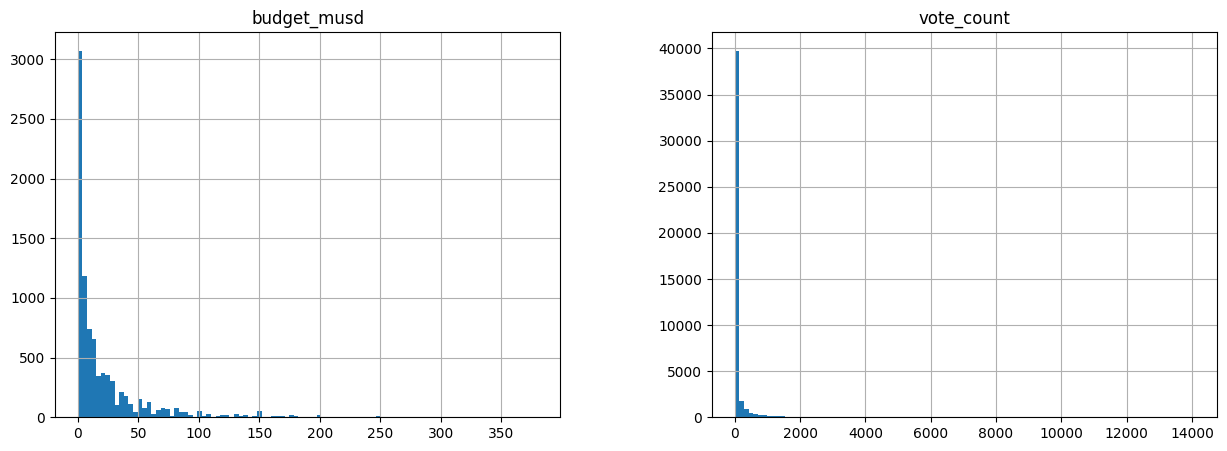

In [50]:
# The original dataframe data
df[['budget_musd', 'vote_count']].hist(figsize = (15, 5), bins = 100)
plt.show()


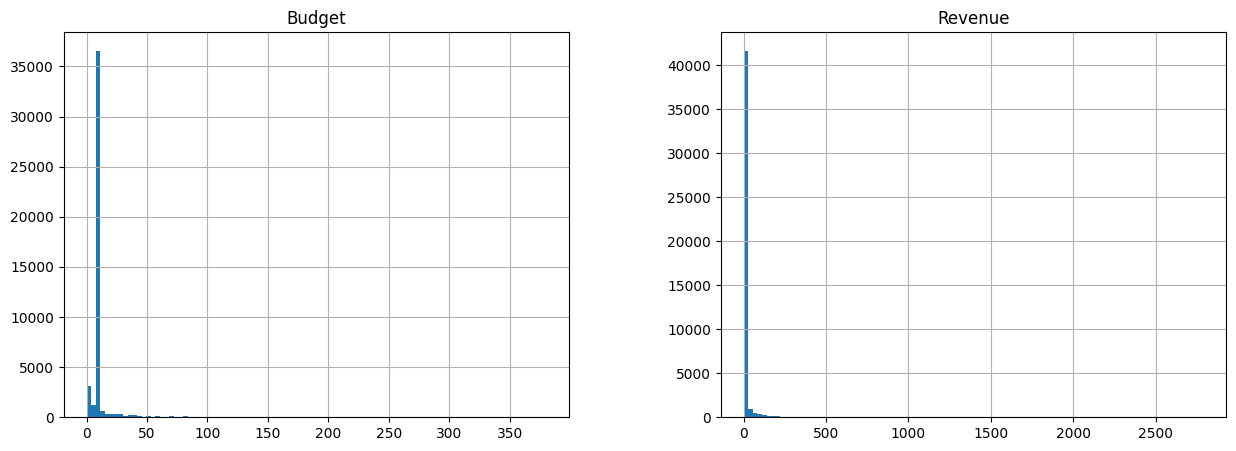

In [51]:
# for comparison
target_columns_df[['Budget', 'Revenue']].hist(figsize = (15, 5), bins = 100)
plt.show()

In [52]:
target_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Poster Path     44467 non-null  object        
 1   Budget          44691 non-null  float64       
 2   Revenue         44691 non-null  float64       
 3   Votes           44691 non-null  float64       
 4   Average Rating  44691 non-null  float64       
 5   Popularity      44691 non-null  float64       
 6   Released        44657 non-null  datetime64[ns]
 7   Profit          44691 non-null  float64       
 8   ROI             44691 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 3.4+ MB


## BEST AND WORSE MOVIES FUNCTION

In [54]:
def movie_filter(
    df: pd.DataFrame,
    number_of_results: int,
    sort_by: str,
    ascending: bool = False,
    min_budget: int = 0,
    min_votes: int = 0,
) -> str:
    """
    Filters movies from a given DataFrame based on minimum budget and votes, then sorts the results.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing movie data.
    number_of_results (int): The number of results to return.
    sort_by (str): The column to sort by.
    ascending (bool, optional): Whether to sort in ascending or descending order. Defaults to False.
    min_budget (int, optional): The minimum budget (in million dollars) required for a movie to be considered. Defaults to 0.
    min_votes (int, optional): The minimum number of votes required for a movie to be considered. Defaults to 0.
    
    Returns:
    str: An HTML table as a string representing the filtered and sorted movie data.

    Example:
    --------
    Assuming you have a DataFrame named 'df_movies' with columns 'Title', 'Budget', 'Votes', and 'Rating',
    you can use the function as follows to get the top 5 movies with at least $50 million budget and 1000 votes,
    sorted by rating in descending order:

    html_result = movie_filter(df_movies, 5, 'Rating', False, 50, 1000)
    display(HTML(html_result))
    """
    
    if not isinstance(df, pd.DataFrame):
        raise ValueError("df must be a pandas DataFrame.")
    if sort_by not in df.columns:
        raise ValueError(f"sort_by column '{sort_by}' not found in dataframe.")

    filtered_df = (
        df.loc[(df['Budget'] >= min_budget) & (df['Votes'] >= min_votes)]
        .sort_values(by=sort_by, ascending=ascending)
        .head(number_of_results)
    )

    return HTML(filtered_df.to_html(escape=False))



## The best and the worst movies... (Part 2)

__Movies Top 5 - Highest Revenue__

In [57]:
# Filter by highest revenue.
movie_filter(
    target_columns_df,10, 'Revenue', False, 5, 5
)


,Poster Path,Budget,Revenue,Votes,Average Rating,Popularity,Released,Profit,ROI
Title,,,,,,,,,
Avatar,,237.00,2787.97,12114.00,7.20,185.07,2009-12-10,2550.97,11.76
Star Wars: The Force Awakens,,245.00,2068.22,7993.00,7.50,31.63,2015-12-15,1823.22,8.44
Titanic,,200.00,1845.03,7770.00,7.50,26.89,1997-11-18,1645.03,9.23
The Avengers,,220.00,1519.56,12000.00,7.40,89.89,2012-04-25,1299.56,6.91
Jurassic World,,150.00,1513.53,8842.00,6.50,32.79,2015-06-09,1363.53,10.09
Furious 7,,190.00,1506.25,4253.00,7.30,27.28,2015-04-01,1316.25,7.93
Avengers: Age of Ultron,,280.00,1405.40,6908.00,7.30,37.38,2015-04-22,1125.40,5.02
Harry Potter and the Deathly Hallows: Part 2,,125.00,1342.00,6141.00,7.90,24.99,2011-07-07,1217.00,10.74
Frozen,,150.00,1274.22,5440.00,7.30,24.25,2013-11-27,1124.22,8.49


In [58]:
# Filter by highest budget.

movie_filter(
    target_columns_df,10, 'Budget', False, 5, 5
)


,Poster Path,Budget,Revenue,Votes,Average Rating,Popularity,Released,Profit,ROI
Title,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides,,380.00,1045.71,5068.00,6.40,27.89,2011-05-14,665.71,2.75
Pirates of the Caribbean: At World's End,,300.00,961.00,4627.00,6.90,31.36,2007-05-19,661.00,3.20
Avengers: Age of Ultron,,280.00,1405.40,6908.00,7.30,37.38,2015-04-22,1125.40,5.02
Superman Returns,,270.00,391.08,1429.00,5.40,13.28,2006-06-28,121.08,1.45
Tangled,,260.00,591.79,3419.00,7.40,14.68,2010-11-24,331.79,2.28
John Carter,,260.00,284.14,2170.00,6.10,14.67,2012-03-07,24.14,1.09
Transformers: The Last Knight,,260.00,604.94,1440.00,6.20,39.19,2017-06-21,344.94,2.33
Spider-Man 3,,258.00,890.87,3687.00,5.90,27.61,2007-05-01,632.87,3.45
The Lone Ranger,,255.00,89.29,2361.00,5.90,12.73,2013-07-03,-165.71,0.35


__Movies Top 5 - Highest Profit__

In [59]:
# Highest Profit.
movie_filter(
    target_columns_df,10, 'Profit', False, 5, 5
)

,Poster Path,Budget,Revenue,Votes,Average Rating,Popularity,Released,Profit,ROI
Title,,,,,,,,,
Avatar,,237.00,2787.97,12114.00,7.20,185.07,2009-12-10,2550.97,11.76
Star Wars: The Force Awakens,,245.00,2068.22,7993.00,7.50,31.63,2015-12-15,1823.22,8.44
Titanic,,200.00,1845.03,7770.00,7.50,26.89,1997-11-18,1645.03,9.23
Jurassic World,,150.00,1513.53,8842.00,6.50,32.79,2015-06-09,1363.53,10.09
Furious 7,,190.00,1506.25,4253.00,7.30,27.28,2015-04-01,1316.25,7.93
The Avengers,,220.00,1519.56,12000.00,7.40,89.89,2012-04-25,1299.56,6.91
Harry Potter and the Deathly Hallows: Part 2,,125.00,1342.00,6141.00,7.90,24.99,2011-07-07,1217.00,10.74
Avengers: Age of Ultron,,280.00,1405.40,6908.00,7.30,37.38,2015-04-22,1125.40,5.02
Frozen,,150.00,1274.22,5440.00,7.30,24.25,2013-11-27,1124.22,8.49


__Movies Top 5 - Lowest Profit__

In [60]:
# Lowest Profit.
movie_filter(
    target_columns_df,10, 'Profit', True, 5, 5
)

,Poster Path,Budget,Revenue,Votes,Average Rating,Popularity,Released,Profit,ROI
Title,,,,,,,,,
The Lone Ranger,,255.00,89.29,2361.00,5.90,12.73,2013-07-03,-165.71,0.35
The Alamo,,145.00,25.82,108.00,5.80,12.24,2004-04-07,-119.18,0.18
Mars Needs Moms,,150.00,38.99,202.00,5.60,7.25,2011-03-09,-111.01,0.26
Valerian and the City of a Thousand Planets,,197.47,90.02,905.00,6.70,15.26,2017-07-20,-107.45,0.46
The 13th Warrior,,160.00,61.70,524.00,6.40,10.31,1999-08-27,-98.30,0.39
The Adventures of Pluto Nash,,100.00,7.10,143.00,4.40,8.90,2002-08-15,-92.90,0.07
Metropolis,,92.62,0.65,666.00,8.00,14.49,1927-01-10,-91.97,0.01
Cutthroat Island,,98.00,10.02,137.00,5.70,7.28,1995-12-22,-87.98,0.10
Live by Night,,108.00,22.68,416.00,6.20,19.94,2016-12-25,-85.32,0.21


__Movies Top 5 - Highest ROI__

In [61]:
# Highest ROI.

movie_filter(
    target_columns_df,10, 'ROI', False, 5, 5
)

,Poster Path,Budget,Revenue,Votes,Average Rating,Popularity,Released,Profit,ROI
Title,,,,,,,,,
E.T. the Extra-Terrestrial,,10.50,792.97,3359.00,7.30,19.36,1982-04-03,782.47,75.52
My Big Fat Greek Wedding,,5.00,368.74,686.00,6.20,6.72,2002-02-22,363.74,73.75
Star Wars,,11.00,775.40,6778.00,8.10,42.15,1977-05-25,764.40,70.49
Jaws,,7.00,470.65,2628.00,7.50,19.73,1975-06-18,463.65,67.24
Crocodile Dundee,,5.00,328.20,512.00,6.30,7.79,1986-09-26,323.20,65.64
The Exorcist,,8.00,441.31,2046.00,7.50,12.14,1973-12-26,433.31,55.16
Get Out,,5.00,252.43,2978.00,7.20,36.89,2017-02-24,247.43,50.49
Four Weddings and a Funeral,,6.00,254.70,654.00,6.60,8.99,1994-03-09,248.70,42.45
Paranormal Activity 3,,5.00,205.70,685.00,5.90,11.00,2011-10-19,200.70,41.14


__Movies Top 5 - Lowest ROI__

In [62]:
# Lowest ROI.

movie_filter(
    target_columns_df,10, 'ROI', True, 5, 5
)

,Poster Path,Budget,Revenue,Votes,Average Rating,Popularity,Released,Profit,ROI
Title,,,,,,,,,
Chasing Liberty,,23.00,0.00,154.00,6.10,5.95,2004-01-09,-23.00,0.00
The Cookout,,16.00,0.00,10.00,4.60,1.76,2004-09-03,-16.00,0.00
Never Talk to Strangers,,6.40,0.00,31.00,4.70,7.51,1995-10-20,-6.40,0.00
Deadfall,,10.00,0.00,14.00,3.10,1.15,1993-10-08,-10.00,0.00
In the Cut,,12.00,0.00,93.00,4.70,5.80,2003-09-09,-12.00,0.00
Death at a Funeral,,9.00,0.00,508.00,6.90,8.83,2007-02-09,-9.00,0.00
A Perfect Man,,5.00,0.00,14.00,4.80,1.74,2013-11-01,-5.00,0.00
The Samaritan,,12.00,0.00,69.00,5.20,11.52,2012-03-02,-12.00,0.00
The Adventurer: The Curse of the Midas Box,,25.00,0.01,74.00,5.10,5.96,2013-12-05,-24.99,0.00


__Movies Top 5 - Most Votes__

In [63]:
# Most Votes.

movie_filter(
    target_columns_df,10, 'Votes', False, 5, 5
)

,Poster Path,Budget,Revenue,Votes,Average Rating,Popularity,Released,Profit,ROI
Title,,,,,,,,,
Inception,,160.00,825.53,14075.00,8.10,29.11,2010-07-14,665.53,5.16
The Dark Knight,,185.00,1004.56,12269.00,8.30,123.17,2008-07-16,819.56,5.43
Avatar,,237.00,2787.97,12114.00,7.20,185.07,2009-12-10,2550.97,11.76
The Avengers,,220.00,1519.56,12000.00,7.40,89.89,2012-04-25,1299.56,6.91
Deadpool,,58.00,783.11,11444.00,7.40,187.86,2016-02-09,725.11,13.50
Interstellar,,165.00,675.12,11187.00,8.10,32.21,2014-11-05,510.12,4.09
Django Unchained,,100.00,425.37,10297.00,7.80,19.79,2012-12-25,325.37,4.25
Guardians of the Galaxy,,170.00,773.33,10014.00,7.90,53.29,2014-07-30,603.33,4.55
Fight Club,,63.00,100.85,9678.00,8.30,63.87,1999-10-15,37.85,1.60


__Movies Top 5 - Highest Rating__

In [67]:
# Highest Rating, no less than 100 votes.

movie_filter(
    target_columns_df,10, 'Average Rating', False, 5, 100
)

,Poster Path,Budget,Revenue,Votes,Average Rating,Popularity,Released,Profit,ROI
Title,,,,,,,,,
Dilwale Dulhania Le Jayenge,,13.20,100.00,661.00,9.10,34.46,1995-10-20,86.80,7.58
Planet Earth,,8.20,16.87,176.00,8.80,4.50,2006-12-10,11.11,2.06
The Shawshank Redemption,,25.00,28.34,8358.00,8.50,51.65,1994-09-23,3.34,1.13
The Godfather,,6.00,245.07,6024.00,8.50,41.11,1972-03-14,239.07,40.84
Your Name.,,8.20,355.30,1030.00,8.50,34.46,2016-08-26,11.11,2.06
Dear Zachary: A Letter to a Son About His Father,,8.20,16.87,146.00,8.40,5.53,2008-10-31,11.11,2.06
The Godfather: Part II,,13.00,47.54,3418.00,8.30,36.63,1974-12-20,34.54,3.66
Life Is Beautiful,,20.00,229.40,3643.00,8.30,39.39,1997-12-20,209.40,11.47
Schindler's List,,22.00,321.37,4436.00,8.30,41.73,1993-11-29,299.37,14.61


__Movies Top 5 - Lowest Rating__

In [68]:
# Lowest Rating, no less than 100 votes.

movie_filter(
    target_columns_df,10, 'Average Rating', True, 5, 100
)

,Poster Path,Budget,Revenue,Votes,Average Rating,Popularity,Released,Profit,ROI
Title,,,,,,,,,
House of the Dead,,7.00,13.82,106.00,2.80,5.70,2003-04-11,6.82,1.97
Dragonball Evolution,,100.00,16.87,475.00,2.90,8.88,2009-04-01,11.11,2.06
Battlefield Earth,,44.00,21.40,259.00,3.00,5.28,2000-05-10,-22.60,0.49
Alone in the Dark,,20.00,10.44,174.00,3.10,5.87,2005-01-28,-9.56,0.52
Disaster Movie,,25.00,14.11,250.00,3.10,11.63,2008-08-29,-10.89,0.56
Epic Movie,,20.00,86.87,334.00,3.20,5.55,2007-01-25,66.87,4.34
FearDotCom,,40.00,18.90,106.00,3.20,5.16,2002-08-09,-21.10,0.47
Rollerball,,8.20,16.87,106.00,3.40,9.35,2002-02-08,11.11,2.06
Gigli,,54.00,7.27,105.00,3.50,11.42,2003-08-01,-46.73,0.13


__Movies Top 5 - Most Popular__

In [69]:
# Most Popular, no less than 100 votes.

movie_filter(
    target_columns_df,10, 'Votes', False, 5, 100
)

,Poster Path,Budget,Revenue,Votes,Average Rating,Popularity,Released,Profit,ROI
Title,,,,,,,,,
Inception,,160.00,825.53,14075.00,8.10,29.11,2010-07-14,665.53,5.16
The Dark Knight,,185.00,1004.56,12269.00,8.30,123.17,2008-07-16,819.56,5.43
Avatar,,237.00,2787.97,12114.00,7.20,185.07,2009-12-10,2550.97,11.76
The Avengers,,220.00,1519.56,12000.00,7.40,89.89,2012-04-25,1299.56,6.91
Deadpool,,58.00,783.11,11444.00,7.40,187.86,2016-02-09,725.11,13.50
Interstellar,,165.00,675.12,11187.00,8.10,32.21,2014-11-05,510.12,4.09
Django Unchained,,100.00,425.37,10297.00,7.80,19.79,2012-12-25,325.37,4.25
Guardians of the Galaxy,,170.00,773.33,10014.00,7.90,53.29,2014-07-30,603.33,4.55
Fight Club,,63.00,100.85,9678.00,8.30,63.87,1999-10-15,37.85,1.60


## Find your next Movie

__Search 1: Science Fiction Action Movie with Bruce Willis (high Rating)__

In [70]:
df.genres[0]

'Animation|Comedy|Family'

In [71]:
mask_genres = df.genres.str.contains("Action") & df.genres.str.contains("Science Fiction")
mask_genres

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: genres, Length: 44691, dtype: bool

In [72]:
df.cast[0]

'Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette'

In [73]:
mask_actor = df.cast.str.contains("Bruce Willis")
mask_actor

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690      NaN
Name: cast, Length: 44691, dtype: object

In [74]:
df.loc[mask_actor & mask_genres, ["title", "vote_average"]].sort_values(by = "vote_average", 
                                                                        ascending = False)

,title,vote_average
1448,The Fifth Element,7.30
19218,Looper,6.60
1786,Armageddon,6.50
14135,Surrogates,5.90
20333,G.I. Joe: Retaliation,5.40
27619,Vice,4.10


In [75]:
bruce = df.loc[mask_actor & mask_genres, ["title", "poster_path", "vote_average"]].sort_values(by = "vote_average", ascending = False).set_index("title")

In [76]:
HTML(bruce.to_html(escape=False))

,poster_path,vote_average
title,,
The Fifth Element,,7.30
Looper,,6.60
Armageddon,,6.50
Surrogates,,5.90
G.I. Joe: Retaliation,,5.40
Vice,,4.10


__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (low runtime)__

In [77]:
df.director

0           John Lasseter
1            Joe Johnston
2           Howard Deutch
3         Forest Whitaker
4           Charles Shyer
               ...       
44686    Hamid Nematollah
44687            Lav Diaz
44688      Mark L. Lester
44689    Yakov Protazanov
44690       Daisy Asquith
Name: director, Length: 44691, dtype: object

In [78]:
mask_director = df.director == "Quentin Tarantino"

In [79]:
mask_actor = df.cast.str.contains("Uma Thurman")

In [80]:
quentin = df.loc[mask_director & mask_actor, 
               ["title", "poster_path", "runtime"]].sort_values(by = "runtime").set_index("title")

In [81]:
HTML(quentin.to_html(escape=False))

,poster_path,runtime
title,,
Kill Bill: Vol. 1,,111.00
Kill Bill: Vol. 2,,136.00
Pulp Fiction,,154.00


__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (high Revenue)__

In [82]:
df.production_companies[1]

'TriStar Pictures|Teitler Film|Interscope Communications'

In [83]:
mask_studio = df.production_companies.str.contains("Pixar").fillna(False)

In [84]:
df.release_date

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
44686          NaT
44687   2011-11-17
44688   2003-08-01
44689   1917-10-21
44690   2017-06-09
Name: release_date, Length: 44691, dtype: datetime64[ns]

In [85]:
mask_time = df.release_date.between("2010-01-01", "2015-12-31")

In [86]:
pixar = df.loc[mask_studio & mask_time, 
               ["title", "poster_path", "revenue_musd", "release_date"]].sort_values(by = "revenue_musd", ascending = False).set_index("title")

In [87]:
HTML(pixar.to_html(escape=False))

,poster_path,revenue_musd,release_date
title,,,
Toy Story 3,,1066.97,2010-06-16
Inside Out,,857.61,2015-06-09
Monsters University,,743.56,2013-06-20
Cars 2,,559.85,2011-06-11
Brave,,538.98,2012-06-21
The Good Dinosaur,,331.93,2015-11-14
Day & Night,,NaN,2010-06-17
The Blue Umbrella,,NaN,2013-02-12
Toy Story of Terror!,,NaN,2013-10-15


__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent)__

In [88]:
mask_genre = df.genres.str.contains("Action") | df.genres.str.contains("Thriller")

In [89]:
mask_lan = df.original_language == "en"

In [90]:
mask_vote_av = df.vote_average >= 7.5 

In [91]:
mask_vote_co = df.vote_count >= 10

In [92]:
next_mov = df.loc[mask_genre & mask_lan & mask_vote_av & mask_vote_co, 
               ["title", "poster_path", "genres", "vote_average", "vote_count", "release_date"]].sort_values(by = "release_date", ascending = False).set_index("title").head(20)

In [93]:
HTML(next_mov.to_html(escape=False))

,poster_path,genres,vote_average,vote_count,release_date
title,,,,,
Descendants 2,,TV Movie|Family|Action|Comedy|Music|Adventure,7.50,171.00,2017-07-21
Dunkirk,,Action|Drama|History|Thriller|War,7.50,2712.00,2017-07-19
The Book of Henry,,Thriller|Drama|Crime,7.60,84.00,2017-06-16
Guardians of the Galaxy Vol. 2,,Action|Adventure|Comedy|Science Fiction,7.60,4858.00,2017-04-19
Logan,,Action|Drama|Science Fiction,7.60,6310.00,2017-02-28
The Thinning,,Thriller,7.60,92.00,2016-10-12
11.22.63,,Drama|History|Thriller,8.00,213.00,2016-02-15
Star Wars: The Force Awakens,,Action|Adventure|Science Fiction|Fantasy,7.50,7993.00,2015-12-15
London Spy,,Romance|Crime|Drama|Mystery|Thriller,8.80,12.00,2015-11-09


## What are the most common Words in Movie Titles and Taglines?

In [ ]:
display(stophere)

In [ ]:
df

In [ ]:
df.tagline[1]

In [ ]:
df.overview[1]

In [ ]:
title = df.title.dropna()
overview = df.overview.dropna()
tagline = df.tagline.dropna()

In [ ]:
title

In [ ]:
' '.join(title)

In [ ]:
title_corpus = ' '.join(title)
overview_corpus = ' '.join(overview)
tagline_corpus = ' '.join(tagline)

In [ ]:
tagline_corpus

In [ ]:
title_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words= 200).generate(title_corpus)
title_wordcloud

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [ ]:
tagline_wordcloud = WordCloud(background_color='white', height=2000, width=4000).generate(tagline_corpus)
plt.figure(figsize=(16,8))
plt.imshow(tagline_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [ ]:
overview_wordcloud = WordCloud(background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

## Are Franchises more successful?

In [ ]:
df.belongs_to_collection

In [ ]:
df["Franchise"] = df.belongs_to_collection.notna()

In [ ]:
df.Franchise

In [ ]:
df.Franchise.value_counts()

__Franchise vs. Stand-alone: Average Revenue__

In [ ]:
df.groupby("Franchise").revenue_musd.mean()

__Franchise vs. Stand-alone: Return on Investment / Profitability__

In [ ]:
df["ROI"] = df.revenue_musd.div(df.budget_musd)

In [ ]:
df.groupby("Franchise").ROI.median()

__Franchise vs. Stand-alone: Average Budget__

In [ ]:
df.groupby("Franchise").budget_musd.mean()

__Franchise vs. Stand-alone: Average Popularity__

In [ ]:
df.groupby("Franchise").popularity.mean()

__Franchise vs. Stand-alone: Average Rating__

In [ ]:
df.groupby("Franchise").vote_average.mean()

In [ ]:
df.groupby("Franchise").agg({"budget_musd": "mean", "revenue_musd": "mean", "vote_average": "mean",
                            "popularity": "mean", "ROI":"median", "vote_count":"mean"})

## Most Successful Franchises

In [ ]:
df.belongs_to_collection

In [ ]:
df.belongs_to_collection.value_counts()

In [ ]:
franchises = df.groupby("belongs_to_collection").agg({"title":"count", "budget_musd": ["sum", "mean"], 
                                                      "revenue_musd": ["sum", "mean"],
                                                      "vote_average": "mean", "popularity": "mean",
                                                      "ROI":"median", 
                                                      "vote_count":"mean"})

In [ ]:
franchises

In [ ]:
franchises.nlargest(20, ("title", "count"))

In [ ]:
franchises.nlargest(20, ("revenue_musd", "mean"))

In [ ]:
franchises.nlargest(20, ("budget_musd", "mean"))

In [ ]:
franchises[franchises[("vote_count", "mean")] >=1000].nlargest(20, ("vote_average", "mean"))

## Most Successful Directors

In [ ]:
df.director

In [ ]:
df.director.value_counts().head(20)

In [ ]:
plt.figure(figsize = (12, 8))
df.director.value_counts().head(20).plot(kind='bar', fontsize = 15)
plt.title("Most Active Directors",fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show()

In [ ]:
df.groupby("director").revenue_musd.sum().nlargest(20)

In [ ]:
plt.figure(figsize = (12, 8))
df.groupby("director").revenue_musd.sum().nlargest(20).plot(kind='bar', fontsize = 15)
plt.title("Total Revenue",fontsize = 20)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.show()

In [ ]:
directors = df.groupby("director").agg({"title": "count", "vote_average" :"mean", "vote_count": "sum"})

In [ ]:
directors

In [ ]:
directors[(directors.vote_count >= 10000) & (directors.title >= 10)].nlargest(20, "vote_average")

In [ ]:
df.genres = df.genres.astype(str)

In [ ]:
df.loc[df.genres.str.contains("Horror")].groupby("director").revenue_musd.sum().nlargest(20)

## Most Successful Actors (Part 1)

In [ ]:
df.cast

In [ ]:
df

In [ ]:
df.set_index("id", inplace = True)

In [ ]:
df.info()

In [ ]:
df.cast

In [ ]:
df.cast.str.split("|", expand = True)

In [ ]:
act = df.cast.str.split("|", expand = True)
act

In [ ]:
act.stack().reset_index(level=1, drop=True).to_frame()

In [ ]:
act = act.stack().reset_index(level=1, drop=True).to_frame()

In [ ]:
act

In [ ]:
act.columns = ["Actor"]

In [ ]:
act = act.merge(df[["title", "revenue_musd", "vote_average", "popularity"]],
                how = "left", left_index = True, right_index = True)

In [ ]:
act

## Most Successful Actors (Part 2)

In [ ]:
act

In [ ]:
act.Actor.nunique()

In [ ]:
act.Actor.unique()

In [ ]:
act.Actor.value_counts().head(20)

In [ ]:
plt.figure(figsize = (12, 8))
act.Actor.value_counts().head(20).plot(kind='bar', fontsize = 15)
plt.title("Most Active Actors",fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show()

In [ ]:
agg = act.groupby("Actor").agg(Total_Revenue = ("revenue_musd", "sum"), 
                               Mean_Revenue = ("revenue_musd", "mean"),
                               Mean_Rating = ("vote_average", "mean"), 
                               Mean_Pop = ("popularity", "mean"), 
                               Total_Movies = ("Actor", "count"))

In [ ]:
agg.nlargest(10, "Total_Movies")

In [ ]:
agg.nlargest(10, "Total_Revenue")

In [ ]:
plt.figure(figsize = (12, 8))
agg.Total_Revenue.nlargest(10).plot(kind='bar', fontsize = 15)
plt.title("Total Revenue",fontsize = 20)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.show()

In [ ]:
agg.Mean_Revenue.nlargest(10)

In [ ]:
act[act.Actor == "Ashley Jeffery"]

In [ ]:
agg[agg.Total_Movies >= 10].nlargest(10, "Mean_Revenue")

In [ ]:
agg[agg.Total_Movies >= 10].nlargest(10, "Mean_Rating")

In [ ]:
agg[agg.Total_Movies >= 10].nlargest(10, "Mean_Pop")